# PART 3
# Question 1
## Read the CSV file.

In [106]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

%matplotlib inline

company= pd.read_csv ('DS+-+Part3+-+CompanyX_EU.csv')
company.head()

,Startup,Product,Funding,Event,Result,OperatingState
0,2600Hz,2600hz.com,NaN,Disrupt SF 2013,Contestant,Operating
1,3DLT,3dlt.com,$630K,Disrupt NYC 2013,Contestant,Closed
2,3DPrinterOS,3dprinteros.com,NaN,Disrupt SF 2016,Contestant,Operating
3,3Dprintler,3dprintler.com,$1M,Disrupt NY 2016,Audience choice,Operating
4,42 Technologies,42technologies.com,NaN,Disrupt NYC 2013,Contestant,Operating


## Question 2.
### 2 A. Check the datatypes of each attribute.
###   B. Check for null values in the attributes.

In [3]:
company.shape

(662, 6)

In [36]:
company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 662 entries, 0 to 661
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Startup         662 non-null    object
 1   Product         656 non-null    object
 2   Funding         448 non-null    object
 3   Event           662 non-null    object
 4   Result          662 non-null    object
 5   OperatingState  662 non-null    object
dtypes: object(6)
memory usage: 31.2+ KB


In [37]:
company.dtypes  #funding need to be convert into standard numerical format for analysis

Startup           object
Product           object
Funding           object
Event             object
Result            object
OperatingState    object
dtype: object

In [38]:
company.isnull().sum()  #'Product' has 6 Null values and 'Funding' has 214 Null values

Startup             0
Product             6
Funding           214
Event               0
Result              0
OperatingState      0
dtype: int64

In [39]:
company.nunique()

Startup           662
Product           656
Funding           240
Event              26
Result              5
OperatingState      4
dtype: int64

## 3. Data preprocessing & visualisation:
## A. Drop the null values. 

In [107]:
company.dropna(inplace=True)
company.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 446 entries, 1 to 661
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Startup         446 non-null    object
 1   Product         446 non-null    object
 2   Funding         446 non-null    object
 3   Event           446 non-null    object
 4   Result          446 non-null    object
 5   OperatingState  446 non-null    object
dtypes: object(6)
memory usage: 24.4+ KB


### Question 3. B.  Convert the ‘Funding’ features to a numerical value.

In [108]:
company.loc[:,'Funds_in_million'] = company['Funding'].apply(lambda x: float(x[1:-1])/1000 if x[-1] == 'K' else (float(x[1:-1])*1000 if x[-1] == 'B' else float(x[1:-1])))

In [109]:
company.head()

,Startup,Product,Funding,Event,Result,OperatingState,Funds_in_million
1,3DLT,3dlt.com,$630K,Disrupt NYC 2013,Contestant,Closed,0.63
3,3Dprintler,3dprintler.com,$1M,Disrupt NY 2016,Audience choice,Operating,1.00
5,5to1,5to1.com,$19.3M,TC50 2009,Contestant,Acquired,19.30
6,8 Securities,8securities.com,$29M,Disrupt Beijing 2011,Finalist,Operating,29.00
10,AdhereTech,adheretech.com,$1.8M,Hardware Battlefield 2014,Contestant,Operating,1.80


In [110]:
company.describe()

,Funds_in_million
count,446.000000
mean,17.241489
std,90.483710
min,0.005000
25%,0.745250
50%,2.200000
75%,9.475000
max,1700.000000


### Q 3
####  C. Plot box plot for funds in million.
#### D. Check the number of outliers greater than the upper fence

<function matplotlib.pyplot.show(close=None, block=None)>

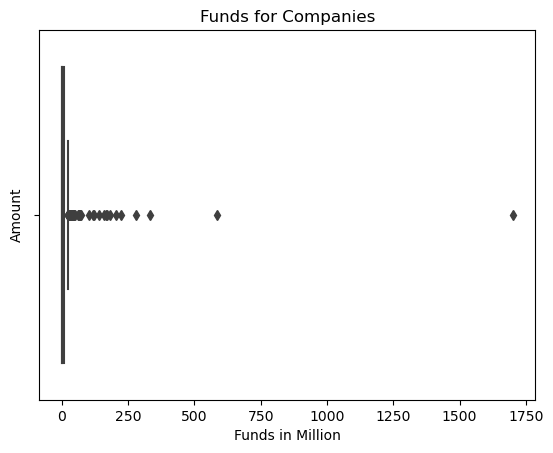

In [50]:
sns.boxplot(data=company, x='Funds_in_million')
plt.title('Funds for Companies')
plt.xlabel('Funds in Million')
plt.ylabel('Amount')
plt.show

In [111]:
import plotly.express as px
px.box(company, x='Funds_in_million')  #IQR 1, and IQR 3 all can be find here.

In [112]:
Q1= np.percentile(company['Funds_in_million'], 25)
Q3= np.percentile(company['Funds_in_million'], 75)
print(Q1)
print(Q3)
IQR = Q3- Q1
print('IQR:', IQR)

0.74525
9.475
IQR: 8.72975


In [85]:
upperfence= Q3+ 1.5*IQR
print(upperfence)
lowerfence = Q1- 1.5*IQR
print(lowerfence)

22.569625
-12.349374999999998


In [114]:
outliers= [i for i in company['Funds_in_million'] if i>upperfence]
outliers

[29.0,
 24.0,
 50.9,
 40.0,
 205.0,
 32.5,
 182.1,
 35.4,
 38.0,
 37.1,
 72.0,
 64.0,
 1700.0,
 34.6,
 35.5,
 30.1,
 26.0,
 66.0,
 28.3,
 103.0,
 25.9,
 36.5,
 44.7,
 24.2,
 122.4,
 34.9,
 67.8,
 166.1,
 42.1,
 69.0,
 65.1,
 25.1,
 31.8,
 37.0,
 38.5,
 25.5,
 24.0,
 278.0,
 24.0,
 63.0,
 25.0,
 160.0,
 40.0,
 47.4,
 24.5,
 25.0,
 332.4,
 35.0,
 168.8,
 28.0,
 30.8,
 41.8,
 142.0,
 117.8,
 26.0,
 28.0,
 62.1,
 583.6,
 223.0,
 31.5]

In [113]:
Number_of_Upperfence_Outliers = len(outliers) #number of outliers the are greater than the upper fence
Number_of_Upperfence_Outliers

60

#### Q3  E . Check frequency of the OperatingState features classes.

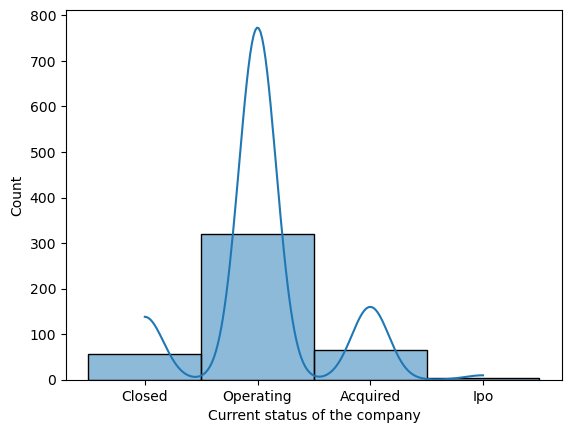

In [97]:
#we use histogram for the frequency.

sns.histplot(data=company, x='OperatingState', kde= True)
plt.xlabel('Current status of the company')
plt.show()

## Q4. Statistical Analysis:
###  A. Is there any significant difference between Funds raised by companies that are still operating vs companies that closed down? 

#### Answer: Yes. From the below scatterplot, we can infer that the Currently operating companies are raised higher funds comparatively than Closed companies.

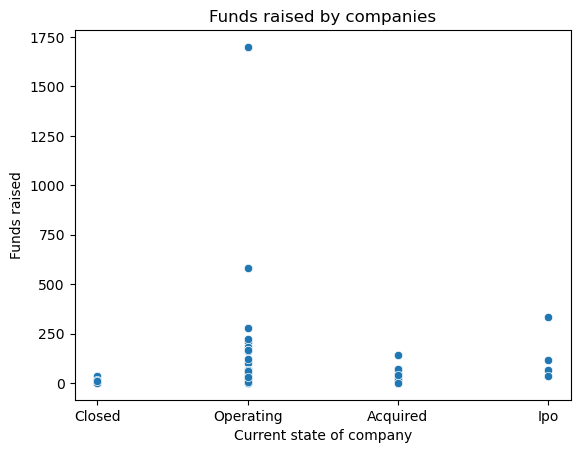

In [102]:
sns.scatterplot(data=company, y='Funds_in_million', x='OperatingState')
plt.title('Funds raised by companies')
plt.xlabel('Current state of company')
plt.ylabel('Funds raised')
plt.show()

### Q4. B. Write the Null Hypothesis and Alternative Hypothesis

#### Null Hypotheis(H0)        =>  There is significant difference between the currently operating companies and closed companies, when it comes to raising funds.  (current state of companies

#### Alternative Hypothesis (Ha) => There is NO difference between the currently operating companies and closed companies, when it comes to raising funds.

### Q4. C. Test for Significant and Conclusion
#### sample size is >30 and mean value is not defined here. so we can proceed with the t-test (two tailed here).

In [164]:
import scipy.stats as stats

Funds_for_operating = company.loc[company.OperatingState == 'Operating', 'Funds_in_million']
Funds_for_closed = company.loc[company.OperatingState =='Closed', 'Funds_in_million']

alpha = 0.05   # Let's consider a significance level of 5%

test_statistic, p_value = stats.ttest_ind(Funds_for_operating, Funds_for_closed)
print(p_value)

if p_value <= alpha:
    print('Since the p-value is',{round(p_value, 3)}, '< {alpha}', 'we reject the null hypothesis')
else:
    print ('Since the p-value is',{round(p_value, 3)},'> {alpha}', 'we failed to reject the null hypothesis')

0.25572701885629406
Since the p-value is {0.256} > {alpha} we failed to reject the null hypothesis


#### D. Make a copy of the original data frame. 

In [167]:
company_copy= company
company_copy

,Startup,Product,Funding,Event,Result,OperatingState,Funds_in_million
1,3DLT,3dlt.com,$630K,Disrupt NYC 2013,Contestant,Closed,0.63
3,3Dprintler,3dprintler.com,$1M,Disrupt NY 2016,Audience choice,Operating,1.00
5,5to1,5to1.com,$19.3M,TC50 2009,Contestant,Acquired,19.30
6,8 Securities,8securities.com,$29M,Disrupt Beijing 2011,Finalist,Operating,29.00
10,AdhereTech,adheretech.com,$1.8M,Hardware Battlefield 2014,Contestant,Operating,1.80
...,...,...,...,...,...,...,...
657,Zivity,zivity.com,$8M,TC40 2007,Contestant,Operating,8.00
658,Zmorph,zmorph3d.com,$1M,-,Audience choice,Operating,1.00
659,Zocdoc,zocdoc.com,$223M,TC40 2007,Contestant,Operating,223.00
660,Zula,zulaapp.com,$3.4M,Disrupt SF 2013,Audience choice,Operating,3.40


### E. Check frequency distribution of Result variables

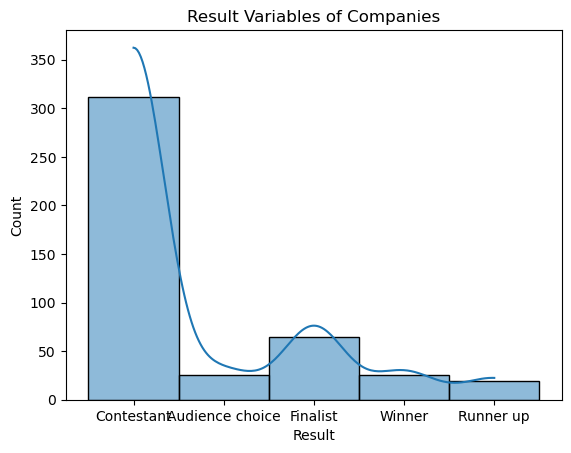

In [171]:
sns.histplot(data=company, x='Result', kde=True)
plt.title('Result Variables of Companies')
plt.show()

In [183]:
company.Result.unique()

array(['Contestant', 'Audience choice', 'Finalist', 'Winner', 'Runner up'],
      dtype=object)

In [257]:
winners = company.Result.value_counts()[1:].sum()
contestants = company.Result.value_counts()['Contestant']

In [258]:
contestants_operating = company.OperatingState[company.Result == 'Contestant'].value_counts().loc['Operating']
winners_operating = company.OperatingState[company.Result != 'Contestant'].value_counts().loc['Operating']


In [274]:
Percentage_of_winners_operating=winners_operating/winners
Percentage_of_contestants_operating=contestants_operating/contestants*100
print("Percentage_of_winners_operating:", round(Percentage_of_winners_operating,2),"%")
print("Percentage_of_contestants_operating:", round(Percentage_of_contestants_operating,2),"%")

Percentage_of_winners_operating: 0.78 %
Percentage_of_contestants_operating: 68.59 %


In [275]:
from statsmodels.stats.proportion import proportions_ztest

test_statistic, p_value = proportions_ztest([contestants_operating, winners_operating], [contestants, winners])

if p_value <= alpha:
    print(f'Since the p-value, {round(p_value, 3)} < {alpha} (alpha) the difference is significant and we reject the Null hypothesis')
else:
    print(f'''\t Since the p-value, {round(p_value,3)} > {alpha} (alpha) the difference is not significant and,
    we fail to reject the Null hypothesis''')

Since the p-value, 0.036 < 0.05 (alpha) the difference is significant and we reject the Null hypothesis


### Select only Event from 2013 with Disrupt keyword.

In [276]:
company[company.Event.apply(lambda x: 'Disrupt' in x)].Event.value_counts()

Disrupt SF 2011         24
Disrupt NYC 2013        22
Disrupt SF 2013         22
Disrupt NY 2015         21
Disrupt NYC 2012        21
Disrupt SF 2012         20
Disrupt NYC 2011        19
Disrupt SF 2010         19
Disrupt SF 2014         19
Disrupt SF 2015         19
Disrupt SF 2016         17
Disrupt NYC 2014        16
Disrupt NY 2016         16
Disrupt NYC 2010        15
Disrupt London 2015     12
Disrupt London 2016     10
Disrupt EU 2014         10
Disrupt EU 2013          9
Disrupt Beijing 2011     7
Name: Event, dtype: int64

In [278]:
Events_from_2013= company[company.Event.apply(lambda x: 'Disrupt' in x and int(x[-4:]) > 2012)].Event  # all the events of relevance
Events_from_2013

1         Disrupt NYC 2013
3          Disrupt NY 2016
13         Disrupt SF 2015
14     Disrupt London 2016
16         Disrupt SF 2015
              ...         
641       Disrupt NYC 2013
642        Disrupt SF 2014
646    Disrupt London 2015
656       Disrupt NYC 2013
660        Disrupt SF 2013
Name: Event, Length: 193, dtype: object